# **Housing Price modeling project**

<table align="center">
  
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1_zqgsE4M3M7xjlDgkoPYiRNBXg4OT4rV?authuser=2#scrollTo=spJCE-HI8CNk">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU""  style="padding-bottom:5px;" />
        
  Run this project in Google Colab</a></td>
  
</table>

Robin is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if we could somehow create a model for him that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.


He provided some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [ ]:
from google.colab import files
files.upload()

Saving USA_Housing.csv to USA_Housing.csv


{'USA_Housing.csv': b'Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address\n79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"\n79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"\n61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"\n63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,"USS Barnett\nFPO AP 44820"\n59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,"USNS Raymond\nFPO AE 09386"\n80175.7541594853,4.9884077575337145,6.104512439428879,4.04,26748.428424689715,1068138.0743935304,"06039 Jennifer Islands Apt. 443\nTracyport, KS 1

In [1]:
!wget https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/USA_housing_Project/Data/USA_Housing.csv

--2020-08-30 21:51:40--  https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/USA_housing_Project/Data/USA_Housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726209 (709K) [text/plain]
Saving to: ‘USA_Housing.csv’

USA_Housing.csv     100%[===================>] 709.19K  --.-KB/s    in 0.1s    

2020-08-30 21:51:40 (6.67 MB/s) - ‘USA_Housing.csv’ saved [726209/726209]



In [2]:
import numpy as np
import pandas as pd

hdat=pd.read_csv("USA_Housing.csv")

In [ ]:
hdat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
hdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
hdat.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
col=hdat.columns

In [ ]:
len(col)

7

In [ ]:
X=hdat[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=hdat['Price']

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X=sklearn.preprocessing.normalize(X, norm='l2')
X=pd.DataFrame(X,columns=col[0:5])
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.960369,0.000069,0.000085,0.000049,0.278732
1,0.891943,0.000068,0.000076,0.000035,0.452148
2,0.856814,0.000082,0.000119,0.000072,0.515625
3,0.879302,0.000100,0.000078,0.000045,0.476264
4,0.915529,0.000077,0.000120,0.000065,0.402252


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lrmodel=LinearRegression()

In [ ]:
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
p_test=lrmodel.predict(X_test)

In [ ]:
from sklearn import metrics 

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, p_test))
print('Mear Squared error:', metrics.mean_squared_error(y_test, p_test))
print('Root Mear Squared error:', np.sqrt(metrics.mean_squared_error(y_test,p_test)))

Mean absolute error: 80893.81190769987
Mear Squared error: 10013679978.582378
Root Mear Squared error: 100068.37651617207


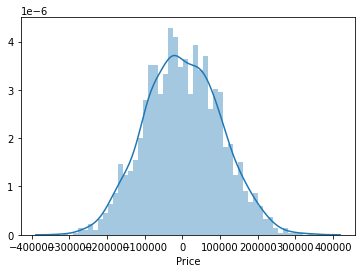

In [ ]:
import seaborn as sns
sns.distplot((y_test-p_test),bins=50)

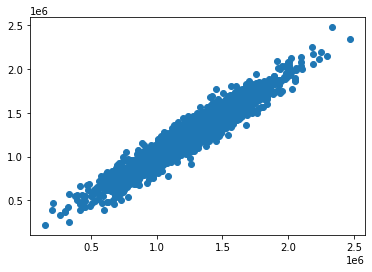

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,p_test)

In [ ]:
print(lrmodel.coef_)

[2.15898874e+01 1.66102501e+05 1.19895936e+05 1.90107101e+03
 1.52315025e+01]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout
from tensorflow.keras.models import Model


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
X=hdat[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=hdat['Price']

In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [ ]:
hdat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
train_dataset = hdat.sample(frac=0.8,random_state=0)
test_dataset = hdat.drop(train_dataset.index)

In [ ]:
test_dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
21,60835.089979,5.551222,6.517175,2.10,45574.741662,9.292476e+05,USNS Brown\nFPO AP 85833
24,59748.855487,5.339340,7.748682,4.23,27809.986544,8.957371e+05,"24282 Paul Valley\nWest Perry, MI 03169-5806"
25,56974.476539,8.287562,7.312880,4.33,40694.869513,1.453975e+06,"61938 Brady Falls\nLewisfort, DE 61227"


In [ ]:
train_dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
398,61200.726175,5.299694,6.234615,4.23,42789.692217,894251.068636,"45153 Salas Hollow Apt. 148\nWest Erica, SD 93725"
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,932979.360621,"3499 Stuart Plains Suite 304\nAaronhaven, NE 8..."
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,920747.911288,"796 Joshua Forges Suite 834\nBensonside, CA 82761"
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,691854.921027,"400 Allen Lodge Apt. 145\nBernardfort, NV 57316"
636,54535.453719,5.278065,6.871038,4.41,30852.207006,732733.236293,146 Christopher Lights Suite 182\nNew Kathysid...


In [ ]:
train_labels = train_dataset.pop('Address')
test_labels = test_dataset.pop('Address')

In [ ]:
y_train=train_dataset['Price']
y_test=test_dataset['Price']

In [ ]:
y_train.head()

398     894251.068636
3833    932979.360621
4836    920747.911288
4572    691854.921027
636     732733.236293
Name: Price, dtype: float64

In [ ]:
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [ ]:
train_dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.726175,5.299694,6.234615,4.23,42789.692217
3833,63380.814670,5.344664,6.001574,2.45,40217.333577
4836,71208.269301,5.300326,6.077989,4.01,25696.361741
4572,50343.763518,6.027468,5.160240,4.35,27445.876739
636,54535.453719,5.278065,6.871038,4.41,30852.207006


In [ ]:
test_dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
7,78394.339278,6.989780,6.620478,2.42,36516.358972
21,60835.089979,5.551222,6.517175,2.10,45574.741662
24,59748.855487,5.339340,7.748682,4.23,27809.986544
25,56974.476539,8.287562,7.312880,4.33,40694.869513


In [ ]:
train_dataset.keys()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
len(test_dataset.keys())

5

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4000.0,68444.594858,10671.908848,17796.631190,61430.372302,68599.889939,75585.770340,107701.748378
Avg. Area House Age,4000.0,5.973092,0.992746,2.644304,5.314110,5.964638,6.644687,9.519088
Avg. Area Number of Rooms,4000.0,7.000958,0.994270,3.236194,6.305099,7.009879,7.674262,10.759588
Avg. Area Number of Bedrooms,4000.0,3.985852,1.225232,2.000000,3.140000,4.060000,4.490000,6.500000
Area Population,4000.0,36189.800987,9936.317370,172.610686,29423.163510,36324.499542,42874.143687,69621.713378


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['max']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,-0.067259,-0.070742,-0.071224,0.037561,0.094796
3833,-0.047017,-0.066018,-0.092883,-0.236285,0.057849
4836,0.025660,-0.070675,-0.085781,0.003715,-0.150721
4572,-0.168064,0.005712,-0.171077,0.056023,-0.125592
636,-0.129145,-0.073014,-0.012075,0.065253,-0.076666


In [ ]:
#build Model
i=Input(shape=len(train_dataset.keys()))
x=Dense(512,activation='relu')(i)
x=Dense(512,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(1)(x)

model=Model(i,x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss='mse',metrics=['mae','mse'])

In [ ]:
r=model.fit(normed_train_data,y_train,validation_split=0.2,epochs=100,callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1622800072704.0000 - mae: 1222918.8750 - mse: 1622800072704.0000
Epoch: 0, loss:1622800072704.0000,  mae:1222918.8750,  mse:1622800072704.0000,  val_loss:1530381205504.0000,  val_mae:1190649.7500,  val_mse:1530381205504.0000,  
100/100 [==============================] - 1s 10ms/step - loss: 1622800072704.0000 - mae: 1222918.8750 - mse: 1622800072704.0000 - val_loss: 1530381205504.0000 - val_mae: 1190649.7500 - val_mse: 1530381205504.0000
Epoch 2/100
100/100 [==============================] - 1s 9ms/step - loss: 1339637760000.0000 - mae: 1103141.1250 - mse: 1339637760000.0000 - val_loss: 986224721920.0000 - val_mae: 944280.3750 - val_mse: 986224721920.0000
Epoch 3/100
100/100 [==============================] - 1s 11ms/step - loss: 546775629824.0000 - mae: 654533.2500 - mse: 546775629824.0000 - val_loss: 121052258304.0000 - val_mae: 289519.7188 - val_mse: 121052258304.0000
Epoch 4/100
100/100 [========================

In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-rmnfgo6c
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-rmnfgo6c
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.037c0e84f64fd6aa5b77f2671dcc34176b00f4ca7_-cp36-none-any.whl size=123963 sha256=cc7449c5a68201cb64c0aa859c0dbc314cc39f37bfe3676548ad0de6f88b4980
  Stored in directory: /tmp/pip-ephem-wheel-cache-ve2b37ls/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
hist = pd.DataFrame(r.history)
hist['epoch'] = r.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,1.033293e+10,81993.726562,1.033293e+10,1.050910e+10,81253.476562,1.050910e+10,95
96,1.028171e+10,81885.562500,1.028171e+10,1.116631e+10,84324.203125,1.116631e+10,96
97,1.032807e+10,82026.671875,1.032807e+10,1.063411e+10,81801.890625,1.063411e+10,97
98,1.026565e+10,81588.820312,1.026565e+10,1.034584e+10,80545.289062,1.034584e+10,98
99,1.031088e+10,82024.546875,1.031088e+10,1.041459e+10,80795.007812,1.041459e+10,99


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Price]')

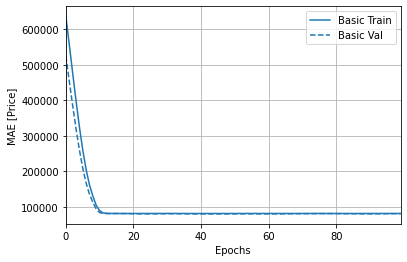

In [ ]:
import matplotlib.pyplot as plt
plotter.plot({'Basic': r}, metric = "mae")

plt.ylabel('MAE [Price]')

Text(0, 0.5, 'MSE [price]')

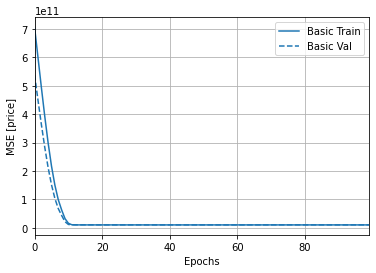

In [ ]:
plotter.plot({'Basic': r}, metric = "mse")

plt.ylabel('MSE [price]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

32/32 - 0s - loss: 10571539456.0000 - mae: 82878.8750 - mse: 10571539456.0000
Testing set Mean Abs Error: 82878.88


Text(0, 0.5, 'Price predictions ')

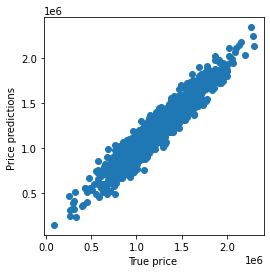

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True price ')
plt.ylabel('Price predictions ')



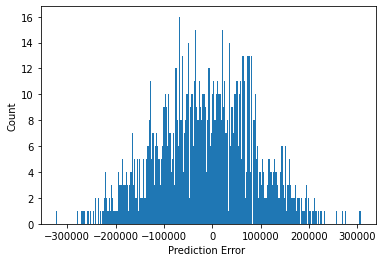

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error ")
_ = plt.ylabel("Count")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


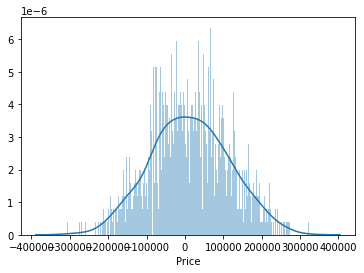

In [ ]:
import seaborn as sns
sns.distplot((y_test-test_predictions),bins=250);

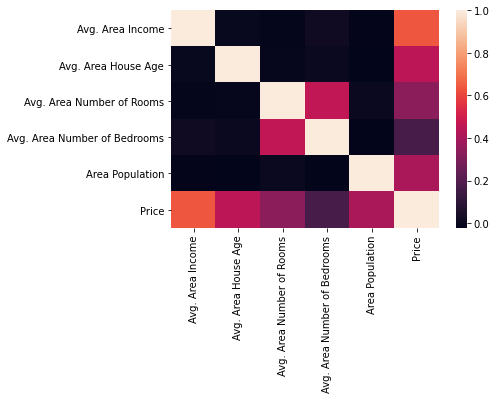

In [ ]:
sns.heatmap(hdat.corr())

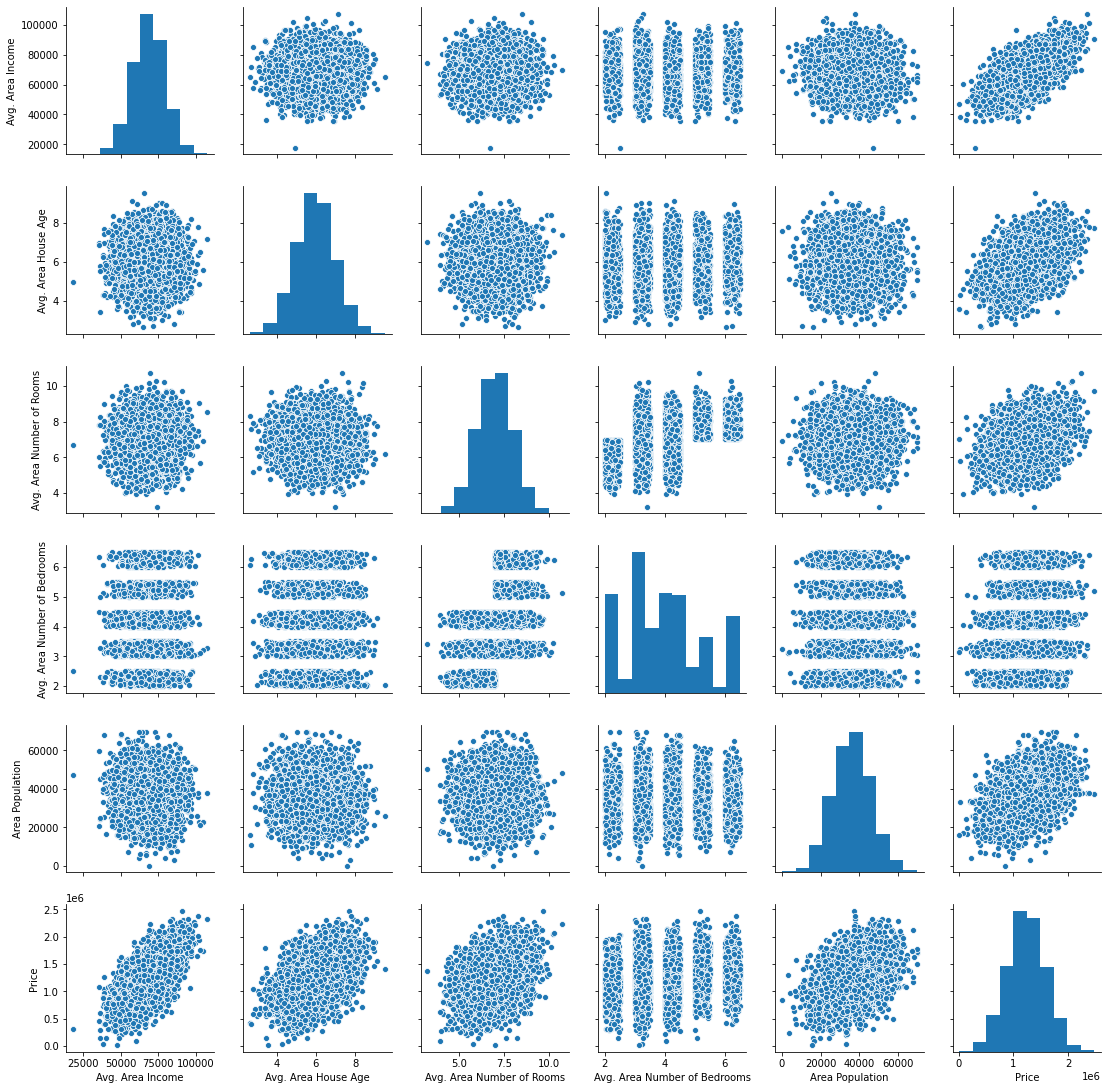

In [ ]:
sns.pairplot(hdat)